In [1]:
# imports

#standard
import pandas as pd
#import random
from datetime import datetime
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

#Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Data Pulls
from bs4 import BeautifulSoup
import requests
import re

In [2]:
df = pd.read_csv('full_transcript.csv', index_col=0)

In [3]:
df.head()

,character,dialogue,word_count,abs_episode,episode_title,season,episode_number
0,Sokka,It's not getting away from me this time. Watc...,19,1,The_Boy_in_the_Iceberg,1,1
1,Katara,"Sokka, look!",2,1,The_Boy_in_the_Iceberg,1,1
2,Sokka,"Sshh! Katara, you're going to scare it away. ...",16,1,The_Boy_in_the_Iceberg,1,1
3,Katara,"But, Sokka! I caught one!",5,1,The_Boy_in_the_Iceberg,1,1
4,Katara,Hey!,1,1,The_Boy_in_the_Iceberg,1,1


In [4]:
df1 = df.loc[df['abs_episode'] == 1].copy()

In [7]:
df1['x_top'] = range(1, 2 * len(df1) + 1, 2)
df1['x_bottom'] = range(1, 2 * len(df1) + 1, 2)

In [8]:
df1.head()

,character,dialogue,word_count,abs_episode,episode_title,season,episode_number,x_top,x_bottom
0,Sokka,It's not getting away from me this time. Watc...,19,1,The_Boy_in_the_Iceberg,1,1,1,1
1,Katara,"Sokka, look!",2,1,The_Boy_in_the_Iceberg,1,1,3,3
2,Sokka,"Sshh! Katara, you're going to scare it away. ...",16,1,The_Boy_in_the_Iceberg,1,1,5,5
3,Katara,"But, Sokka! I caught one!",5,1,The_Boy_in_the_Iceberg,1,1,7,7
4,Katara,Hey!,1,1,The_Boy_in_the_Iceberg,1,1,9,9


In [9]:
df1['y_top'] = df1['word_count']/2
df1['y_bottom'] = df1['word_count']/2 * -1

In [10]:
df1.head()

,character,dialogue,word_count,abs_episode,episode_title,season,episode_number,x_top,x_bottom,y_top,y_bottom
0,Sokka,It's not getting away from me this time. Watc...,19,1,The_Boy_in_the_Iceberg,1,1,1,1,9.5,-9.5
1,Katara,"Sokka, look!",2,1,The_Boy_in_the_Iceberg,1,1,3,3,1.0,-1.0
2,Sokka,"Sshh! Katara, you're going to scare it away. ...",16,1,The_Boy_in_the_Iceberg,1,1,5,5,8.0,-8.0
3,Katara,"But, Sokka! I caught one!",5,1,The_Boy_in_the_Iceberg,1,1,7,7,2.5,-2.5
4,Katara,Hey!,1,1,The_Boy_in_the_Iceberg,1,1,9,9,0.5,-0.5


In [ ]:
#https://stackoverflow.com/questions/55939775/succint-way-to-add-line-segments-to-plotly-graph-with-python-jupyter-notebook

In [11]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go

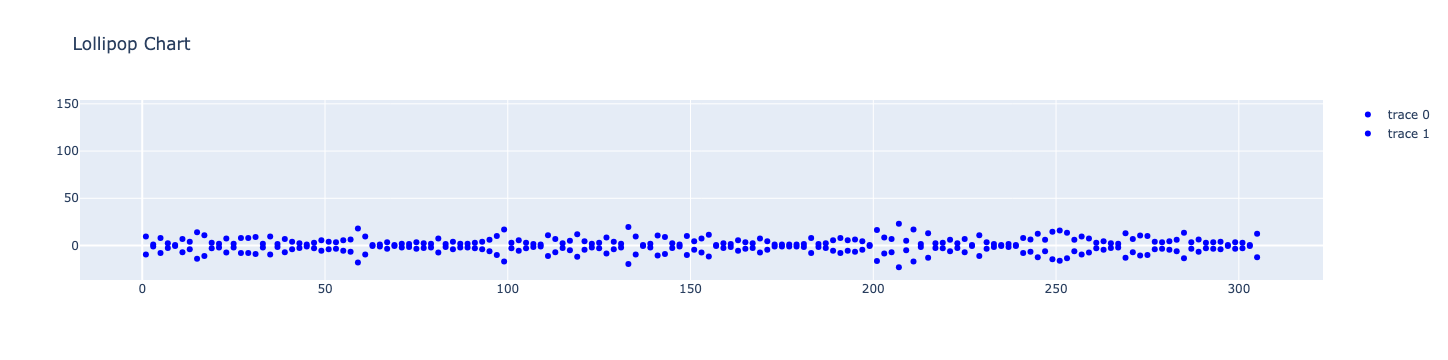

In [18]:
data1 = go.Scatter(
        x=df1['x_top'],
        y=df1['y_top'],
        mode='markers',
        marker=dict(color='blue')
)
    
data2 = go.Scatter(
        x=df1['x_bottom'],
        y=df1['y_bottom'],
        mode='markers',
        marker=dict(color='blue')
)

shapes=[dict(
        type='line',
        x0 = df1['x_top'].loc[i],
        y0 = i + 1,
        x1 = df1['x_bottom'].loc[i],
        y1 = i + 1,
        line = dict(
            color = 'grey',
            width = 2
        )
    ) for i in range(len(df1['x_top']))]

layout = go.Layout(
    shapes = shapes,
    title='Lollipop Chart')


fig = go.Figure([data1, data2], layout)
fig.show()


In [ ]:
import plotly.express as px

# Sample data
data = {'x_values': [1, 2, 3, 4, 5],
        'y_values': [10, 20, 15, 25, 30]}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a line chart
fig = px.line(df, x='x_values', y='y_values', title='Sample Line Chart')

# Display the figure
fig.show()